In [128]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten

In [129]:
(X_train,y_train),(X_test,y_test)=keras.datasets.mnist.load_data()

In [130]:
X_test.shape

(10000, 28, 28)

In [131]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

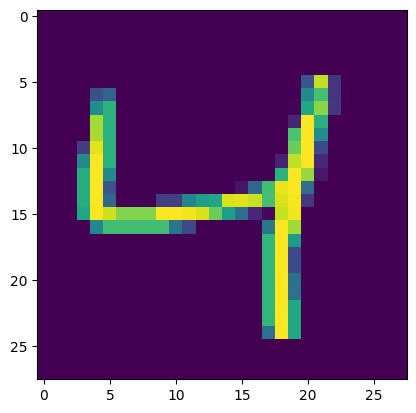

In [132]:
import matplotlib.pyplot as plt
plt.imshow(X_train[2])

In [133]:
X_train = X_train/255
X_test = X_test/255


In [134]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [135]:
model=Sequential()

model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [136]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_7 (Flatten)         (None, 784)               0         
                                                                 
 dense_18 (Dense)            (None, 128)               100480    
                                                                 
 dense_19 (Dense)            (None, 32)                4128      
                                                                 
 dense_20 (Dense)            (None, 10)                330       
                                                                 
Total params: 104938 (409.91 KB)
Trainable params: 104938 (409.91 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [137]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [138]:
history=model.fit(X_train,y_train,epochs=25,validation_split=0.2)

Epoch 1/25
1500/1500 [==============================] - 13s 8ms/step - loss: 0.2918 - accuracy: 0.9136 - val_loss: 0.1544 - val_accuracy: 0.9544
Epoch 2/25
1500/1500 [==============================] - 8s 6ms/step - loss: 0.1209 - accuracy: 0.9638 - val_loss: 0.1357 - val_accuracy: 0.9607
Epoch 3/25
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0824 - accuracy: 0.9749 - val_loss: 0.0995 - val_accuracy: 0.9697
Epoch 4/25
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0611 - accuracy: 0.9806 - val_loss: 0.0913 - val_accuracy: 0.9741
Epoch 5/25
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0470 - accuracy: 0.9849 - val_loss: 0.0906 - val_accuracy: 0.9740
Epoch 6/25
1500/1500 [==============================] - 7s 4ms/step - loss: 0.0391 - accuracy: 0.9874 - val_loss: 0.1017 - val_accuracy: 0.9743
Epoch 7/25
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0313 - accuracy: 0.9904 - val_loss: 0.1025 - val_accuracy

In [139]:
y_prob=model.predict(X_test)

313/313 [==============================] - 1s 3ms/step


In [148]:
y_pred=y_prob.argmax(axis=1)

In [149]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9747

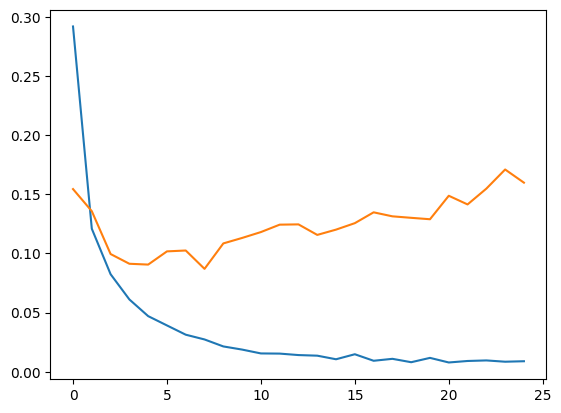

In [150]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

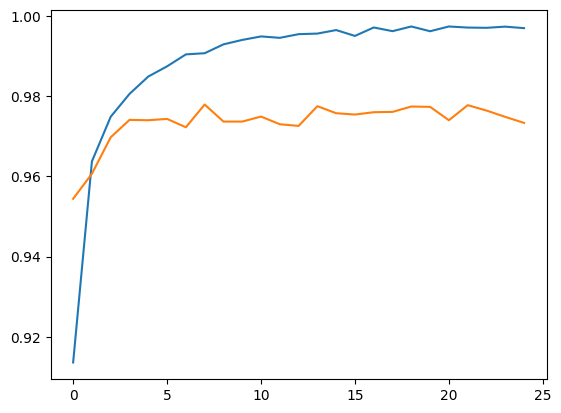

In [151]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

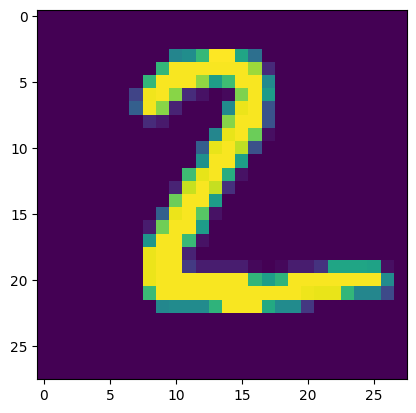

In [152]:
plt.imshow(X_test[1])

In [155]:
model.predict(X_test[1].reshape(1,28,28)).argmax(axis=1)

1/1 [==============================] - 0s 158ms/step


array([2])